<a href="https://colab.research.google.com/github/DeepLabCut/DeepLabCut/blob/pytorch_dlc/examples/COLAB/COLAB_YOURDATA_SuperAnimal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DeepLabCut Model Zoo: SuperAnimal models

![alt text](https://images.squarespace-cdn.com/content/v1/57f6d51c9f74566f55ecf271/1616492373700-PGOAC72IOB6AUE47VTJX/ke17ZwdGBToddI8pDm48kB8JrdUaZR-OSkKLqWQPp_YUqsxRUqqbr1mOJYKfIPR7LoDQ9mXPOjoJoqy81S2I8N_N4V1vUb5AoIIIbLZhVYwL8IeDg6_3B-BRuF4nNrNcQkVuAT7tdErd0wQFEGFSnBqyW03PFN2MN6T6ry5cmXqqA9xITfsbVGDrg_goIDasRCalqV8R3606BuxERAtDaQ/modelzoo.png?format=1000w)

# 🦄 SuperAnimal in DeepLabCut PyTorch! 🔥

This notebook demos how to use our SuperAnimal models within DeepLabCut 3.0! Please read more in [Ye et al. Nature Communications 2024](https://www.nature.com/articles/s41467-024-48792-2) about the available SuperAnimal models, and follow along below!

### **Let's get going: install the latest version of DeepLabCut into COLAB:**

*Also, be sure you are connected to a GPU: go to menu, click Runtime > Change Runtime Type > select "GPU"*


In [ ]:
! apt update && apt install cuda-11-8
! pip install tensorflow==2.12.0
! pip install --upgrade "jax[cuda]==0.3.22" -f https://storage.googleapis.com/jax-releases/jax_cuda_releases.html
! pip install keypoint-moseq

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:6 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Ign:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [2,717 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:14 https://r2u.st

Looking in links: https://storage.googleapis.com/jax-releases/jax_cuda_releases.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.7/160.7 MB 5.3 MB/s eta 0:00:00
  Created wheel for jax: filename=jax-0.3.22-py3-none-any.whl size=1273151 sha256=dda48f60e86c5484cbc091acf808f6a0cbdb3cc5627c75bfa08c9d16418158a8
  Stored in directory: /root/.cache/pip/wheels/aa/88/07/df55c350f1b02bd11473255b915a94ce1e472779299ed6f032
Successfully built jax
  Attempting uninstall: jaxlib
    Found existing installation: jaxlib 0.4.26+cuda12.cudnn89
    Uninstalling jaxlib-0.4.26+cuda12.cudnn89:
      Successfully uninstalled jaxlib-0.4.26+cuda12.cudnn89
  Attempting uninstall: jax
    Found existing installation: jax 0.4.26
    Uninstalling jax-0.4.26:
      Successfully uninstalled jax-0.4.26
ERROR: pip's dependency resolver does not currently take into account all the packages that a

**PLEASE, click "restart runtime" from the output above before proceeding!**

In [ ]:
! pip install "git+https://github.com/DeepLabCut/DeepLabCut.git@pytorch_dlc#egg=deeplabcut[gui,modelzoo,wandb]"

DEPRECATION: git+https://github.com/DeepLabCut/DeepLabCut.git@pytorch_dlc#egg=deeplabcut[gui,modelzoo,wandb] contains an egg fragment with a non-PEP 508 name pip 25.0 will enforce this behaviour change. A possible replacement is to use the req @ url syntax, and remove the egg fragment. Discussion can be found at https://github.com/pypa/pip/issues/11617
  Cloning https://github.com/DeepLabCut/DeepLabCut.git (to revision pytorch_dlc) to /tmp/pip-install-wvf_k84t/deeplabcut_0fc1e07ec3ff4324b48d75fccf889eeb
  Running command git clone --filter=blob:none --quiet https://github.com/DeepLabCut/DeepLabCut.git /tmp/pip-install-wvf_k84t/deeplabcut_0fc1e07ec3ff4324b48d75fccf889eeb
  Running command git checkout -b pytorch_dlc --track origin/pytorch_dlc
  Switched to a new branch 'pytorch_dlc'
  Branch 'pytorch_dlc' set up to track remote branch 'pytorch_dlc' from 'origin'.
  Resolved https://github.com/DeepLabCut/DeepLabCut.git to commit 7232eac466c9497e971db6e51d108772bfab2874
  Installing build

In [ ]:
import os
from pathlib import Path
import deeplabcut
from deeplabcut.modelzoo.video_inference import video_inference_superanimal


### Zero-shot Video Inference

This can be done with or without video adaptation (faster, but not self-supervised fine-tuned on your data!).

#### Upload a video you want to predict

In [ ]:
from google.colab import files

uploaded = files.upload()
for filepath, content in uploaded.items():
    print(f"User uploaded file '{filepath}' with length {len(content)} bytes")

video_path = os.path.abspath(filepath)
video_name = os.path.splitext(video_path)[0]
video_dir = Path(video_path).parent

# If this cell fails (e.g., when using Safari in place of Google Chrome),
# manually upload your video via the Files menu to the left
# and define `video_path` yourself with right click > copy path on the video.

Saving OFT_43_short.mp4 to OFT_43_short.mp4
User uploaded file 'OFT_43_short.mp4' with length 1722307 bytes


#### Choose the superanimal and the model name

In [ ]:
# @markdown ---
# @markdown SuperAnimal Configurations
superanimal_name = "superanimal_topviewmouse" #@param ["superanimal_topviewmouse", "superanimal_quadruped"]
model_name = "hrnetw32" #@param ["hrnetw32"]

# @markdown ---
# @markdown What is the maximum number of animals you expect to have in an image
max_individuals = 1  # @param {type:"slider", min:1, max:30, step:1}

#### Zero-shot Video Inference with video adaptation (unsupervised)

The labeled video (and pose predictions for the video) are saved in `"/content/"`, with the labeled video name being `{your_video_name}_superanimal_{superanimal_name}_hrnetw32_labeled_after_adapt.mp4`.

In [ ]:
_ = video_inference_superanimal(
    videos=[video_path],
    superanimal_name=f"{superanimal_name}_{model_name}",
    video_adapt=False,
    max_individuals=max_individuals,
    pseudo_threshold=0.1,
    bbox_threshold=0.9,
    detector_epochs=1,
    pose_epochs=1,
    dest_folder="/content/superanimal_prediction"
)

running video inference on ['/content/OFT_43_short.mp4'] with superanimal_topviewmouse_hrnetw32
Using pytorch for model hrnetw32
using /content/OFT_43_short.mp4 for video adaptation training
Task: None
scorer: None
date: None
multianimalproject: None
identity: None
project_path: /usr/local/lib/python3.10/dist-packages/deeplabcut/modelzoo/project_configs
engine: pytorch
video_sets: None
bodyparts: ['nose', 'left_ear', 'right_ear', 'left_ear_tip', 'right_ear_tip', 'left_eye', 'right_eye', 'neck', 'mid_back', 'mouse_center', 'mid_backend', 'mid_backend2', 'mid_backend3', 'tail_base', 'tail1', 'tail2', 'tail3', 'tail4', 'tail5', 'left_shoulder', 'left_midside', 'left_hip', 'right_shoulder', 'right_midside', 'right_hip', 'tail_end', 'head_midpoint']
start: None
stop: None
numframes2pick: None
skeleton: []
skeleton_color: black
pcutoff: None
dotsize: None
alphavalue: None
colormap: rainbow
TrainingFraction: None
iteration: None
default_net_type: None
default_augmenter: None
snapshotindex: No

  0%|          | 1/1002 [00:00<09:08,  1.83it/s]


OutOfMemoryError: CUDA out of memory. Tried to allocate 66.00 MiB. GPU 

### Running keypoint-moseq training with superanimal output

In [ ]:
import deeplabcut
from pathlib import Path
import keypoint_moseq as kpms

project_dir = 'demo_project'

config = lambda: kpms.load_config(project_dir)

# change it to dlc config

dlc_config = os.path.join(Path(deeplabcut.__file__).parent, 'modelzoo', 'project_configs', 'superanimal_topviewmouse.yaml')

#dlc_config = os.path.join(Path(deeplabcut.__file__).parent, 'modelzoo', 'project_configs', 'superanimal_quadruped.yaml')

video_dir = "/content/superanimal_prediction"

kpms.setup_project(project_dir, deeplabcut_config=dlc_config)

kpms.update_config(
    project_dir,
    video_dir= video_dir,
    anterior_bodyparts=['nose'],
    posterior_bodyparts=['tail1'],
    use_bodyparts=[
        'nose', 'mid_backend', 'mid_backend2', 'mid_backend3',
        'tail_base', 'tail1',]
)

coordinates, confidences, bodyparts = kpms.load_keypoints(video_dir, 'deeplabcut')

data, metadata = kpms.format_data(coordinates, confidences, **config())





The directory `demo_project` already exists. Use `overwrite=True` or
pick a different name


Loading keypoints: 100%|██████████████████| 1/1 [00:00<00:00, 43.36it/s]
/usr/local/lib/python3.10/dist-packages/keypoint_moseq/util.py:980: UserWarning:

Negative confidence values are not allowed and will be set to 0.



### Visualizing the results of keypoint-moseq

>=90.0% of variance exlained by 3 components.


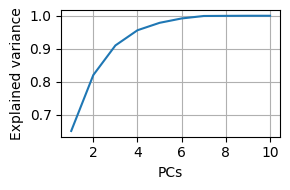

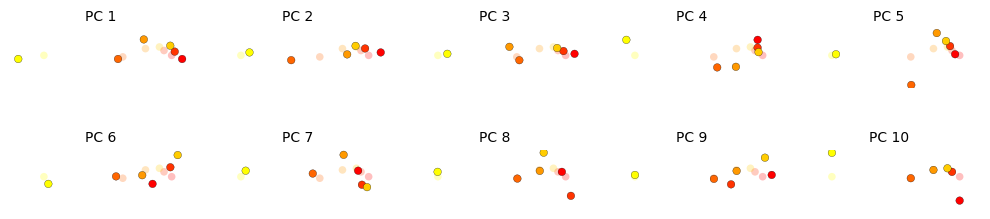

In [ ]:
pca = kpms.fit_pca(**data, **config())
kpms.save_pca(pca, project_dir)

kpms.print_dims_to_explain_variance(pca, 0.9)
kpms.plot_scree(pca, project_dir=project_dir)
kpms.plot_pcs(pca, project_dir=project_dir, **config())